# Hackanoho 2025

## Loading libraries

In [372]:
# load some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import urllib.request
import ssl
import shutil
import warnings

## Getting the data


This can be installed from the Stats NZ website if you prefer a "point and click" approach: [https://www.stats.govt.nz/information-releases/statistical-area-1-dataset-for-2018-census-updated-march-2020/](https://www.stats.govt.nz/information-releases/statistical-area-1-dataset-for-2018-census-updated-march-2020/)


They attempt to prevent programmatic downloads, but this can be circumvented by using a browser-like user agent with the `requests` library...

In [373]:
# create a 'data' directory if it doesn't exist
DATA_DIR = 'data'
os.makedirs(DATA_DIR, exist_ok=True)


In [374]:
# download the SA1-level 2018 census data from Stats NZ
ZIP_PATH = os.path.join(DATA_DIR, '2018-census.zip')
URL =   'https://www3.stats.govt.nz/2018census/SA1Dataset/Statistical%20Area%201%20dataset%20for%20Census%202018%20-%20total%20New%20Zealand%20-%20CSV_updated_16-7-20.zip'
ssl_context = ssl._create_unverified_context()

# download the file if it doesn't exist
if not os.path.exists(ZIP_PATH):
    print('Downloading', URL)
    # create a request with a browser-like user agent
    req = urllib.request.Request(
        URL, 
        data=None, 
        headers={
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
        }
    )
    
    # use urlopen with context parameter and user agent
    with urllib.request.urlopen(req, context=ssl_context) as response, open(ZIP_PATH, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)
    
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        print('Extracting', ZIP_PATH)
        zip_ref.extractall(DATA_DIR)
else:
    print(f"File already exists at {ZIP_PATH}")

# look at the files in the data directory
os.listdir(DATA_DIR)

File already exists at data/2018-census.zip


['.DS_Store',
 '2018-census.zip',
 'Individual_part3a_totalNZ-wide_format_updated_16-7-20.csv',
 'Individual_part3b_totalNZ-wide_format_updated_16-7-20.csv',
 'Dwellings_totalNZ-wide_format_updated_16-7-20.csv',
 'Individual_part2_totalNZ-wide_format_updated_16-7-20.csv',
 'Households_totalNZ-wide_format_updated_16-7-20.csv',
 'Individual_part1_totalNZ-wide_format_updated_16-7-20.csv']

## Loading the data

In [375]:
# load each of the CSVs in the data directory, and print the first few rows and columns
csv_files = [f for f in os.listdir(DATA_DIR) if f.endswith('.csv')]
for f in csv_files:
    print(f)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        df = pd.read_csv(os.path.join(DATA_DIR, f))
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns}")
    print(f"First few rows:")
    print(df.iloc[:5, :5])



Individual_part3a_totalNZ-wide_format_updated_16-7-20.csv


Shape: (32521, 243)
Columns: Index(['Area_code_and_description', 'Area_code', 'Area_description',
       'Census_2006_Work_and_labour_force_status_1_Employed_Full_time_CURP_15years_and_over',
       'Census_2006_Work_and_labour_force_status_2_Employed_Part_time_CURP_15years_and_over',
       'Census_2006_Work_and_labour_force_status_3_Unemployed_CURP_15years_and_over',
       'Census_2006_Work_and_labour_force_status_4_Not_in_the_Labour_Force_CURP_15years_and_over',
       'Census_2006_Work_and_labour_force_status_Total_stated_CURP_15years_and_over',
       'Census_2006_Work_and_labour_force_status_9_Work_and_Labour_Force_Status_Unidentifiable_CURP_15years_and_over',
       'Census_2006_Work_and_labour_force_status_Total_CURP_15years_and_over',
       ...
       'Census_2018_Industry_by_workplace_address_M_Professional_Scientific_and_Technical_Services_CURP_employed_15years_and_over',
       'Census_2018_Industry_by_workplace_address_N_Administrative_and_Support_Services_CURP_employed_

In [376]:
# load all the tables starting with 'Individual' and concatenate them (horizontally); order them lexicographically
individual_dfs = [f for f in csv_files if f.startswith('Individual')]
individual_dfs = sorted(individual_dfs)
individual_dfs = [pd.read_csv(os.path.join(DATA_DIR, f)) for f in individual_dfs]
# join them using the first two columns as the index
individual_df = pd.concat(individual_dfs, axis=1, join='inner')
individual_df = individual_df.loc[:,~individual_df.columns.duplicated()]
print(f"Shape: {individual_df.shape}")
individual_df.head()


/var/folders/j6/x86rzj9n1s9dkp1dkqyx2h9r0000gn/T/ipykernel_23403/905472097.py:4: DtypeWarning: Columns (1,2,300,312,324) have mixed types. Specify dtype option on import or set low_memory=False.
  individual_dfs = [pd.read_csv(os.path.join(DATA_DIR, f)) for f in individual_dfs]
/var/folders/j6/x86rzj9n1s9dkp1dkqyx2h9r0000gn/T/ipykernel_23403/905472097.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  individual_dfs = [pd.read_csv(os.path.join(DATA_DIR, f)) for f in individual_dfs]
/var/folders/j6/x86rzj9n1s9dkp1dkqyx2h9r0000gn/T/ipykernel_23403/905472097.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  individual_dfs = [pd.read_csv(os.path.join(DATA_DIR, f)) for f in individual_dfs]
/var/folders/j6/x86rzj9n1s9dkp1dkqyx2h9r0000gn/T/ipykernel_23403/905472097.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  in

Shape: (32521, 1307)


,Area_code_and_description,Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count,Census_2006_census_night_population_count,Census_2013_census_night_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,...,Census_2018_Unpaid_activities_total_responses_0_No_activities_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_1_Household_work_cooking_repairs_gardening_etc_for_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_2_Looking_after_a_child_who_is_a_member_of_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_3_Looking_after_a_member_of_own_household_who_is_ill_or_has_a_disability_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_4_Looking_after_a_child_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_5_Helping_someone_who_is_ill_or_has_a_disability_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_6_Other_helping_or_voluntary_work_for_or_through_any_organisation_group_or_marae_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_stated_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_9_Not_elsewhere_included_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_CURP_15years_and_over
0,SA1 7000000,7000000,7000000,165,144,141,177,150,138,114,...,18,69,21,12,18,9,33,87,30,120
1,SA1 7000001,7000001,7000001,93,105,114,117,108,120,87,...,3,63,27,12,9,6,21,63,21,84
2,SA1 7000002,7000002,7000002,0,0,0,0,0,0,C,...,C,C,C,C,C,C,C,C,C,0
3,SA1 7000003,7000003,7000003,216,171,225,219,168,222,171,...,9,108,45,21,21,15,48,120,48,168
4,SA1 7000004,7000004,7000004,90,102,138,90,105,129,117,...,9,84,33,15,27,27,27,96,21,114


In [377]:
# let's check out those mixed types, starting with the leading rows...
# find values in these columns which are not numeric
individual_df.iloc[:,0][individual_df.iloc[:,0].apply(lambda x: not str(x).isnumeric())]
    


0                        SA1 7000000
1                        SA1 7000001
2                        SA1 7000002
3                        SA1 7000003
4                        SA1 7000004
                    ...             
32516               16 Tasman Region
32517               17 Nelson Region
32518          18 Marlborough Region
32519         99 Area Outside Region
32520    Total NZ (Regional Council)
Name: Area_code_and_description, Length: 32521, dtype: object

In [378]:
# filter to rows where the first column starts with the string 'SA1'
SA1_df = individual_df[individual_df.iloc[:,0].apply(lambda x: str(x).startswith('SA1'))]
print(f"Shape: {SA1_df.shape}")
# check the tail
SA1_df.tail()


Shape: (29889, 1307)


,Area_code_and_description,Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count,Census_2006_census_night_population_count,Census_2013_census_night_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,...,Census_2018_Unpaid_activities_total_responses_0_No_activities_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_1_Household_work_cooking_repairs_gardening_etc_for_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_2_Looking_after_a_child_who_is_a_member_of_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_3_Looking_after_a_member_of_own_household_who_is_ill_or_has_a_disability_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_4_Looking_after_a_child_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_5_Helping_someone_who_is_ill_or_has_a_disability_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_6_Other_helping_or_voluntary_work_for_or_through_any_organisation_group_or_marae_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_stated_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_9_Not_elsewhere_included_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_CURP_15years_and_over
29884,SA1 7999912,7999912,7999912,0,0,0,0,0,0,C,...,C,C,C,C,C,C,C,C,C,0
29885,SA1 7999913,7999913,7999913,0,0,0,0,0,0,C,...,C,C,C,C,C,C,C,C,C,0
29886,SA1 7999914,7999914,7999914,0,0,0,0,0,0,C,...,C,C,C,C,C,C,C,C,C,0
29887,SA1 7999915,7999915,7999915,0,0,0,0,0,6,C,...,C,C,C,C,C,C,C,C,C,0
29888,SA1 7999916,7999916,7999916,0,0,0,0,0,0,C,...,C,C,C,C,C,C,C,C,C,0


In [379]:
# drop the selected rows from individual_df
individual_df = individual_df.drop(SA1_df.index)
individual_df.head()

,Area_code_and_description,Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count,Census_2006_census_night_population_count,Census_2013_census_night_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,...,Census_2018_Unpaid_activities_total_responses_0_No_activities_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_1_Household_work_cooking_repairs_gardening_etc_for_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_2_Looking_after_a_child_who_is_a_member_of_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_3_Looking_after_a_member_of_own_household_who_is_ill_or_has_a_disability_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_4_Looking_after_a_child_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_5_Helping_someone_who_is_ill_or_has_a_disability_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_6_Other_helping_or_voluntary_work_for_or_through_any_organisation_group_or_marae_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_stated_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_9_Not_elsewhere_included_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_CURP_15years_and_over
29889,Total NZ (Statistical Area 1),total,Total NZ (Statistical Area 1),4027947,4242048,4699755,4143282,4353198,4793358,3971892,...,363819,2673633,904797,226386,437424,256275,473688,3115566,660786,3776355
29890,100100 North Cape,100100,North Cape,1338,1371,1602,1464,1455,1680,1314,...,102,837,288,132,174,153,273,978,309,1287
29891,100200 Rangaunu Harbour,100200,Rangaunu Harbour,2010,2028,2310,2022,2013,2280,1803,...,120,1089,426,120,225,153,282,1242,498,1740
29892,100300 Inlets Far North District,100300,Inlets Far North District,63,63,45,78,135,84,42,...,3,33,3,0,3,6,9,36,9,45
29893,100400 Karikari Peninsula,100400,Karikari Peninsula,942,1164,1251,1062,1287,1236,888,...,57,639,147,63,87,93,135,708,318,1029


In [380]:
 # grab all the rows where the first column starts with 'Total'
total_df = individual_df[individual_df.iloc[:,0].apply(lambda x: str(x).startswith('Total'))]
print(f"Shape: {total_df.shape}")
total_df


Shape: (7, 1307)


,Area_code_and_description,Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count,Census_2006_census_night_population_count,Census_2013_census_night_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,...,Census_2018_Unpaid_activities_total_responses_0_No_activities_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_1_Household_work_cooking_repairs_gardening_etc_for_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_2_Looking_after_a_child_who_is_a_member_of_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_3_Looking_after_a_member_of_own_household_who_is_ill_or_has_a_disability_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_4_Looking_after_a_child_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_5_Helping_someone_who_is_ill_or_has_a_disability_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_6_Other_helping_or_voluntary_work_for_or_through_any_organisation_group_or_marae_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_stated_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_9_Not_elsewhere_included_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_CURP_15years_and_over
29889,Total NZ (Statistical Area 1),total,Total NZ (Statistical Area 1),4027947,4242048,4699755,4143282,4353198,4793358,3971892,...,363819,2673633,904797,226386,437424,256275,473688,3115566,660786,3776355
32143,Total NZ (Statistical Area 2),total,Total NZ (Statistical Area 2),4027947,4242048,4699755,4143282,4353198,4793358,3971892,...,363819,2673633,904797,226386,437424,256275,473688,3115566,660786,3776355
32389,Total NZ (Ward),total,Total NZ (Ward),4027947,4242048,4699755,4143282,4353198,4793358,3971892,...,363819,2673633,904797,226386,437424,256275,473688,3115566,660786,3776355
32411,Total NZ (District Health Board),total,Total NZ (District Health Board),4027947,4242048,4699755,4143282,4353198,4793358,3971892,...,363819,2673633,904797,226386,437424,256275,473688,3115566,660786,3776355
32480,Total NZ (Territorial Authority),total,Total NZ (Territorial Authority),4027947,4242048,4699755,4143282,4353198,4793358,3971892,...,363819,2673633,904797,226386,437424,256275,473688,3115566,660786,3776355
32502,Total (Local Board Area (Auckland Region)),total,Total (Local Board Area (Auckland Region)),1304958,1415550,1571718,1322925,1438446,1590261,1289547,...,135657,845952,303459,69591,115908,66717,126564,1007940,249936,1257879
32520,Total NZ (Regional Council),total,Total NZ (Regional Council),4027947,4242048,4699755,4143282,4353198,4793358,3971892,...,363819,2673633,904797,226386,437424,256275,473688,3115566,660786,3776355


In [381]:
# let's drop those rows from individual_df for now...
individual_df = individual_df.drop(total_df.index)
individual_df.head()


,Area_code_and_description,Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count,Census_2006_census_night_population_count,Census_2013_census_night_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,...,Census_2018_Unpaid_activities_total_responses_0_No_activities_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_1_Household_work_cooking_repairs_gardening_etc_for_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_2_Looking_after_a_child_who_is_a_member_of_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_3_Looking_after_a_member_of_own_household_who_is_ill_or_has_a_disability_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_4_Looking_after_a_child_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_5_Helping_someone_who_is_ill_or_has_a_disability_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_6_Other_helping_or_voluntary_work_for_or_through_any_organisation_group_or_marae_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_stated_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_9_Not_elsewhere_included_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_CURP_15years_and_over
29890,100100 North Cape,100100,North Cape,1338,1371,1602,1464,1455,1680,1314,...,102,837,288,132,174,153,273,978,309,1287
29891,100200 Rangaunu Harbour,100200,Rangaunu Harbour,2010,2028,2310,2022,2013,2280,1803,...,120,1089,426,120,225,153,282,1242,498,1740
29892,100300 Inlets Far North District,100300,Inlets Far North District,63,63,45,78,135,84,42,...,3,33,3,0,3,6,9,36,9,45
29893,100400 Karikari Peninsula,100400,Karikari Peninsula,942,1164,1251,1062,1287,1236,888,...,57,639,147,63,87,93,135,708,318,1029
29894,100500 Tangonge,100500,Tangonge,1041,1131,1134,1020,1119,1107,879,...,48,555,207,81,117,72,168,633,249,882


In [382]:
# now let's isolate the rows that start with a 6-digit number -  these look like SA2s
SA2_df = individual_df[individual_df.iloc[:,0].apply(lambda x: str(x)[:6].isnumeric())]
print(f"Shape: {SA2_df.shape}")
SA2_df.tail()

Shape: (2253, 1307)


,Area_code_and_description,Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count,Census_2006_census_night_population_count,Census_2013_census_night_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,...,Census_2018_Unpaid_activities_total_responses_0_No_activities_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_1_Household_work_cooking_repairs_gardening_etc_for_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_2_Looking_after_a_child_who_is_a_member_of_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_3_Looking_after_a_member_of_own_household_who_is_ill_or_has_a_disability_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_4_Looking_after_a_child_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_5_Helping_someone_who_is_ill_or_has_a_disability_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_6_Other_helping_or_voluntary_work_for_or_through_any_organisation_group_or_marae_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_stated_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_9_Not_elsewhere_included_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_CURP_15years_and_over
32138,400012 Oceanic Snares Islands,400012,Oceanic Snares Islands,0,0,0,0,0,0,C,...,C,C,C,C,C,C,C,C,C,0
32139,400013 Snares Islands,400013,Snares Islands,0,0,0,0,0,0,C,...,C,C,C,C,C,C,C,C,C,0
32140,400014 Oceanic Antipodes Islands,400014,Oceanic Antipodes Islands,0,0,0,0,0,0,C,...,C,C,C,C,C,C,C,C,C,0
32141,400015 Antipodes Islands,400015,Antipodes Islands,0,0,0,0,0,6,C,...,C,C,C,C,C,C,C,C,C,0
32142,400016 Ross Dependency,400016,Ross Dependency,0,0,0,0,0,0,C,...,C,C,C,C,C,C,C,C,C,0


In [383]:
# drop the selected rows from individual_df
individual_df = individual_df.drop(SA2_df.index)
individual_df.head()

,Area_code_and_description,Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count,Census_2006_census_night_population_count,Census_2013_census_night_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,...,Census_2018_Unpaid_activities_total_responses_0_No_activities_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_1_Household_work_cooking_repairs_gardening_etc_for_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_2_Looking_after_a_child_who_is_a_member_of_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_3_Looking_after_a_member_of_own_household_who_is_ill_or_has_a_disability_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_4_Looking_after_a_child_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_5_Helping_someone_who_is_ill_or_has_a_disability_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_6_Other_helping_or_voluntary_work_for_or_through_any_organisation_group_or_marae_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_stated_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_9_Not_elsewhere_included_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_CURP_15years_and_over
32144,00101 Te Hiku Ward,00101,Te Hiku Ward,17520,17478,20310,18258,17919,20145,15207,...,1188,9579,3246,1305,1893,1467,2550,11106,4656,15762
32145,00102 Bay of Islands-Whangaroa Ward,00102,Bay of Islands-Whangaroa Ward,24663,25284,30009,28305,27981,32151,23733,...,1812,16509,5220,1704,2745,1872,3924,18786,5325,24108
32146,00103 Kaikohe-Hokianga Ward,00103,Kaikohe-Hokianga Ward,13665,12972,14931,13932,13023,14778,9861,...,843,6138,2277,996,1350,1074,2094,7236,4059,11298
32147,00201 Mangakahia-Maungatapere Ward,00201,Mangakahia-Maungatapere Ward,5016,5556,6687,4968,5487,6585,5745,...,357,4053,1425,387,723,492,771,4476,810,5286
32148,00202 Hikurangi-Coastal Ward,00202,Hikurangi-Coastal Ward,10734,11559,13626,10953,11895,13632,11442,...,708,7851,2832,744,1554,918,1572,8757,1890,10644


In [384]:
# now same for wards
ward_df = individual_df[individual_df.iloc[:,0].apply(lambda x: str(x).endswith('Ward'))]
print(f"Shape: {ward_df.shape}")
ward_df.tail()

Shape: (245, 1307)


,Area_code_and_description,Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count,Census_2006_census_night_population_count,Census_2013_census_night_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,...,Census_2018_Unpaid_activities_total_responses_0_No_activities_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_1_Household_work_cooking_repairs_gardening_etc_for_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_2_Looking_after_a_child_who_is_a_member_of_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_3_Looking_after_a_member_of_own_household_who_is_ill_or_has_a_disability_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_4_Looking_after_a_child_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_5_Helping_someone_who_is_ill_or_has_a_disability_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_6_Other_helping_or_voluntary_work_for_or_through_any_organisation_group_or_marae_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_stated_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_9_Not_elsewhere_included_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_CURP_15years_and_over
32384,07610 Howick Ward,07610,Howick Ward,113505,127125,140970,113535,127905,142002,122430,...,13800,80319,30087,6066,8835,4947,10377,96678,17013,113691
32385,07611 Manukau Ward,07611,Manukau Ward,140475,146619,163572,141984,149205,165240,112458,...,13083,64911,27183,8637,9882,5979,10272,80835,41430,122262
32386,07612 Manurewa-Papakura Ward,07612,Manurewa-Papakura Ward,118752,127875,153303,118170,127632,153138,113610,...,11826,69033,28095,7863,10848,5730,9954,83370,31614,114987
32387,07613 Franklin Ward,07613,Franklin Ward,58605,65319,74838,58524,65547,74865,64248,...,4974,43764,16014,3618,7293,3759,6777,49728,9345,59076
32388,99999 Area Outside Ward,99999,Area Outside Ward,177,51,39,4818,963,216,33,...,3,18,3,3,3,0,3,27,6,36


In [385]:
individual_df = individual_df.drop(ward_df.index)
individual_df.head()

,Area_code_and_description,Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count,Census_2006_census_night_population_count,Census_2013_census_night_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,...,Census_2018_Unpaid_activities_total_responses_0_No_activities_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_1_Household_work_cooking_repairs_gardening_etc_for_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_2_Looking_after_a_child_who_is_a_member_of_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_3_Looking_after_a_member_of_own_household_who_is_ill_or_has_a_disability_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_4_Looking_after_a_child_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_5_Helping_someone_who_is_ill_or_has_a_disability_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_6_Other_helping_or_voluntary_work_for_or_through_any_organisation_group_or_marae_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_stated_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_9_Not_elsewhere_included_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_CURP_15years_and_over
32390,DHB 01 Northland,01,Northland,148440,151689,179076,154350,155805,181047,142626,...,11409,95697,31845,10407,17958,12108,21351,110013,31443,141453
32391,DHB 02 Waitemata,02,Waitemata,481614,525555,586335,484047,530163,590166,497061,...,47718,332577,121959,25719,47283,26139,48975,389850,80199,470049
32392,DHB 03 Auckland,03,Auckland,404619,436344,467604,419370,451296,479010,390648,...,45618,261396,82383,18333,32514,20646,41037,315204,73896,389100
32393,DHB 04 Counties Manukau,04,Counties Manukau,433083,469296,537633,433779,472356,540021,418608,...,43446,263370,103350,26502,37950,20925,38328,315654,98463,414120
32394,DHB 05 Waikato,05,Waikato,339189,359310,405558,347151,366843,411939,339777,...,28953,226962,78516,21237,40773,23490,41919,262386,57675,320061


In [386]:
# and DHBs
DHB_df = individual_df[individual_df.iloc[:,0].apply(lambda x: str(x).startswith('DHB'))]
print(f"Shape: {DHB_df.shape}")
DHB_df.tail()

Shape: (21, 1307)


,Area_code_and_description,Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count,Census_2006_census_night_population_count,Census_2013_census_night_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,...,Census_2018_Unpaid_activities_total_responses_0_No_activities_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_1_Household_work_cooking_repairs_gardening_etc_for_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_2_Looking_after_a_child_who_is_a_member_of_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_3_Looking_after_a_member_of_own_household_who_is_ill_or_has_a_disability_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_4_Looking_after_a_child_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_5_Helping_someone_who_is_ill_or_has_a_disability_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_6_Other_helping_or_voluntary_work_for_or_through_any_organisation_group_or_marae_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_stated_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_9_Not_elsewhere_included_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_CURP_15years_and_over
32406,DHB 17 West Coast,17,West Coast,31326,32148,31575,35841,36294,35202,27330,...,2325,18672,5358,1683,3456,2361,4212,21591,4383,25974
32407,DHB 18 Canterbury,18,Canterbury,467016,482778,539631,484098,495303,550572,478722,...,42786,329754,107010,24492,54672,30825,55089,381204,59886,441087
32408,DHB 19 South Canterbury,19,South Canterbury,53880,55623,58977,55950,58065,62565,52992,...,4701,36480,10653,2826,6138,3888,7116,42273,6252,48525
32409,DHB 22 Southern,22,Southern,286224,297420,324405,307203,322614,343089,286503,...,25863,197475,60285,14670,33945,19338,40089,229140,38235,267375
32410,DHB 99 Area Outside District Health Board,99,Area Outside District Health Board,447,312,189,5325,1536,1134,186,...,33,93,15,0,6,6,12,129,45,177


In [387]:
individual_df = individual_df.drop(DHB_df.index)
individual_df.head()


,Area_code_and_description,Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count,Census_2006_census_night_population_count,Census_2013_census_night_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,...,Census_2018_Unpaid_activities_total_responses_0_No_activities_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_1_Household_work_cooking_repairs_gardening_etc_for_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_2_Looking_after_a_child_who_is_a_member_of_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_3_Looking_after_a_member_of_own_household_who_is_ill_or_has_a_disability_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_4_Looking_after_a_child_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_5_Helping_someone_who_is_ill_or_has_a_disability_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_6_Other_helping_or_voluntary_work_for_or_through_any_organisation_group_or_marae_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_stated_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_9_Not_elsewhere_included_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_CURP_15years_and_over
32412,001 Far North District,001,Far North District,55845,55734,65250,60498,58920,67077,48798,...,3840,32226,10743,4005,5988,4410,8568,37128,14040,51171
32413,002 Whangarei District,002,Whangarei District,74463,76995,90960,75423,77751,91230,75279,...,6069,50718,17277,5136,9657,6126,9762,58233,13608,71841
32414,003 Kaipara District,003,Kaipara District,18135,18963,22869,18429,19134,22737,18555,...,1497,12753,3828,1266,2313,1575,3021,14652,3795,18444
32415,011 Thames-Coromandel District,011,Thames-Coromandel District,25938,26178,29895,29091,29394,31881,24771,...,2214,17799,4311,1536,2880,1995,4161,20526,4878,25407
32416,012 Hauraki District,012,Hauraki District,17856,17808,20022,17889,17793,19833,16725,...,1470,11370,3420,1191,1923,1392,2301,13206,3072,16278


In [388]:
# and districts
district_df = individual_df[individual_df.iloc[:,0].apply(lambda x: str(x).endswith('District'))]
print(f"Shape: {district_df.shape}")
district_df.tail()

Shape: (53, 1307)


,Area_code_and_description,Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count,Census_2006_census_night_population_count,Census_2013_census_night_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,...,Census_2018_Unpaid_activities_total_responses_0_No_activities_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_1_Household_work_cooking_repairs_gardening_etc_for_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_2_Looking_after_a_child_who_is_a_member_of_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_3_Looking_after_a_member_of_own_household_who_is_ill_or_has_a_disability_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_4_Looking_after_a_child_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_5_Helping_someone_who_is_ill_or_has_a_disability_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_6_Other_helping_or_voluntary_work_for_or_through_any_organisation_group_or_marae_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_stated_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_9_Not_elsewhere_included_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_CURP_15years_and_over
32471,069 Central Otago District,069,Central Otago District,16644,17895,21558,17400,18879,22893,19173,...,1452,13587,3786,810,2235,1125,3018,15402,2505,17907
32472,070 Queenstown-Lakes District,070,Queenstown-Lakes District,22959,28224,39153,32592,38862,47025,32133,...,2838,22371,7083,1050,2931,1323,3942,25704,6930,32634
32474,072 Clutha District,072,Clutha District,16839,16890,17667,17160,17361,18180,15654,...,1341,10434,3357,816,1878,1002,2562,12144,2112,14256
32475,073 Southland District,073,Southland District,28437,29613,30864,32109,33138,34194,27840,...,2325,18303,6411,1272,3453,1695,4362,21216,3117,24333
32476,074 Gore District,074,Gore District,12108,12033,12396,12111,12150,12492,11013,...,1017,7341,2304,615,1413,867,1557,8598,1428,10023


In [389]:
individual_df = individual_df.drop(district_df.index)
individual_df.head()

,Area_code_and_description,Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count,Census_2006_census_night_population_count,Census_2013_census_night_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,...,Census_2018_Unpaid_activities_total_responses_0_No_activities_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_1_Household_work_cooking_repairs_gardening_etc_for_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_2_Looking_after_a_child_who_is_a_member_of_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_3_Looking_after_a_member_of_own_household_who_is_ill_or_has_a_disability_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_4_Looking_after_a_child_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_5_Helping_someone_who_is_ill_or_has_a_disability_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_6_Other_helping_or_voluntary_work_for_or_through_any_organisation_group_or_marae_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_stated_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_9_Not_elsewhere_included_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_CURP_15years_and_over
32419,016 Hamilton City,016,Hamilton City,129588,141612,160911,132408,143718,163440,134184,...,12147,89010,31563,8154,15444,8835,14907,103725,22773,126498
32426,023 Tauranga City,023,Tauranga City,103881,114789,136713,105303,116190,137781,116319,...,9429,78636,26949,6672,13653,7818,13014,90240,18912,109152
32434,031 Napier City,031,Napier City,55359,57240,62241,57210,58830,63741,52371,...,4611,35457,11526,3258,6702,3990,5970,41121,8796,49920
32443,040 Palmerston North City,040,Palmerston North City,77727,80079,84639,78894,81228,85716,73911,...,6975,49755,16584,4278,8802,5049,9231,58203,9729,67932
32447,044 Porirua City,044,Porirua City,48546,51717,56559,48672,51429,56811,47247,...,3510,30987,12807,3417,6483,3201,6066,35409,7707,43116


In [390]:
# cities seem to start with 3-digit numbers (these are territorial authorities)
TA_df = individual_df[individual_df.iloc[:,0].apply(lambda x: str(x)[:3].isnumeric())]
print(f"Shape: {TA_df.shape}")
TA_df

Shape: (15, 1307)


,Area_code_and_description,Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count,Census_2006_census_night_population_count,Census_2013_census_night_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,...,Census_2018_Unpaid_activities_total_responses_0_No_activities_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_1_Household_work_cooking_repairs_gardening_etc_for_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_2_Looking_after_a_child_who_is_a_member_of_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_3_Looking_after_a_member_of_own_household_who_is_ill_or_has_a_disability_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_4_Looking_after_a_child_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_5_Helping_someone_who_is_ill_or_has_a_disability_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_6_Other_helping_or_voluntary_work_for_or_through_any_organisation_group_or_marae_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_stated_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_9_Not_elsewhere_included_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_CURP_15years_and_over
32419,016 Hamilton City,016,Hamilton City,129588,141612,160911,132408,143718,163440,134184,...,12147,89010,31563,8154,15444,8835,14907,103725,22773,126498
32426,023 Tauranga City,023,Tauranga City,103881,114789,136713,105303,116190,137781,116319,...,9429,78636,26949,6672,13653,7818,13014,90240,18912,109152
32434,031 Napier City,031,Napier City,55359,57240,62241,57210,58830,63741,52371,...,4611,35457,11526,3258,6702,3990,5970,41121,8796,49920
32443,040 Palmerston North City,040,Palmerston North City,77727,80079,84639,78894,81228,85716,73911,...,6975,49755,16584,4278,8802,5049,9231,58203,9729,67932
32447,044 Porirua City,044,Porirua City,48546,51717,56559,48672,51429,56811,47247,...,3510,30987,12807,3417,6483,3201,6066,35409,7707,43116
32448,045 Upper Hutt City,045,Upper Hutt City,38415,40179,43980,38916,40620,44439,39129,...,3204,26712,9561,2358,4833,2670,4494,30606,4815,35421
32449,046 Lower Hutt City,046,Lower Hutt City,97701,98238,104532,97839,98220,104685,90087,...,7482,61026,22140,5586,10869,6096,11202,70224,13170,83397
32450,047 Wellington City,047,Wellington City,179466,190956,202737,185187,197019,209172,183081,...,14349,132621,39744,8559,17490,10857,26040,150213,19668,169881
32455,052 Nelson City,052,Nelson City,42888,46437,50880,45372,48444,53082,44922,...,3693,31257,9801,2469,5397,3465,6159,35829,6024,41853
32463,060 Christchurch City,060,Christchurch City,348456,341469,369006,361968,350889,378480,325170,...,31215,224733,69756,16473,36084,21543,36381,262002,43308,305310


In [391]:
individual_df = individual_df.drop(TA_df.index)
individual_df.head()

,Area_code_and_description,Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count,Census_2006_census_night_population_count,Census_2013_census_night_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,...,Census_2018_Unpaid_activities_total_responses_0_No_activities_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_1_Household_work_cooking_repairs_gardening_etc_for_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_2_Looking_after_a_child_who_is_a_member_of_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_3_Looking_after_a_member_of_own_household_who_is_ill_or_has_a_disability_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_4_Looking_after_a_child_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_5_Helping_someone_who_is_ill_or_has_a_disability_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_6_Other_helping_or_voluntary_work_for_or_through_any_organisation_group_or_marae_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_stated_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_9_Not_elsewhere_included_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_CURP_15years_and_over
32481,CMB 07601 Rodney Local Board Area,07601,Rodney Local Board Area,49359,54882,66417,49665,55440,66183,56226,...,4026,39246,14001,3237,6447,3543,6756,44148,9018,53166
32482,CMB 07602 Hibiscus and Bays Local Board Area,07602,Hibiscus and Bays Local Board Area,81858,89829,104010,82362,90660,104817,93060,...,8196,63771,22497,4476,9264,5046,9414,73713,10839,84552
32483,CMB 07603 Upper Harbour Local Board Area,07603,Upper Harbour Local Board Area,42876,53670,62841,43470,54645,64020,54966,...,6735,35670,13464,2367,3987,2181,4506,43542,7713,51252
32484,CMB 07604 Kaipatiki Local Board Area,07604,Kaipatiki Local Board Area,79128,82494,88269,79443,83025,88773,75504,...,8106,50352,17874,3399,6393,3456,6963,59901,11919,71820
32485,CMB 07605 Devonport-Takapuna Local Board Area,07605,Devonport-Takapuna Local Board Area,52653,55470,57975,53520,56913,59499,51702,...,5073,35103,12138,2256,4914,2916,5502,41325,6258,47580


In [392]:
# local board areas
LBA_df = individual_df[individual_df.iloc[:,0].apply(lambda x: str(x).endswith('Local Board Area'))]
print(f"Shape: {LBA_df.shape}")
LBA_df.tail()

Shape: (21, 1307)


,Area_code_and_description,Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count,Census_2006_census_night_population_count,Census_2013_census_night_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,...,Census_2018_Unpaid_activities_total_responses_0_No_activities_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_1_Household_work_cooking_repairs_gardening_etc_for_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_2_Looking_after_a_child_who_is_a_member_of_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_3_Looking_after_a_member_of_own_household_who_is_ill_or_has_a_disability_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_4_Looking_after_a_child_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_5_Helping_someone_who_is_ill_or_has_a_disability_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_6_Other_helping_or_voluntary_work_for_or_through_any_organisation_group_or_marae_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_stated_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_9_Not_elsewhere_included_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_CURP_15years_and_over
32497,CMB 07617 Mangere-Otahuhu Local Board Area,07617,Mangere-Otahuhu Local Board Area,68154,70959,78450,69207,72939,79635,54051,...,5964,30933,13410,4428,5073,3021,5298,38292,19455,57750
32498,CMB 07618 Otara-Papatoetoe Local Board Area,07618,Otara-Papatoetoe Local Board Area,72324,75663,85122,72777,76269,85605,58404,...,7119,33981,13776,4206,4815,2958,4977,42540,21975,64515
32499,CMB 07619 Manurewa Local Board Area,07619,Manurewa Local Board Area,77190,82242,95670,76992,82242,95769,68499,...,7347,40590,16866,4956,6297,3354,5982,49539,21441,70980
32500,CMB 07620 Papakura Local Board Area,07620,Papakura Local Board Area,41559,45636,57636,41181,45393,57372,45111,...,4479,28446,11229,2910,4551,2376,3972,33834,10173,44004
32501,CMB 07621 Franklin Local Board Area,07621,Franklin Local Board Area,58605,65319,74838,58524,65547,74865,64248,...,4974,43764,16014,3618,7293,3759,6777,49728,9345,59076


In [393]:
# and now are left with Regional Councils!
individual_df = individual_df.drop(LBA_df.index)
RC_df = individual_df
print(f"Shape: {RC_df.shape}")
RC_df

Shape: (17, 1307)


,Area_code_and_description,Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count,Census_2006_census_night_population_count,Census_2013_census_night_population_count,Census_2018_census_night_population_count,Census_2018_Unit_record_data_source_11_2018_Census_individual_form_CURP,...,Census_2018_Unpaid_activities_total_responses_0_No_activities_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_1_Household_work_cooking_repairs_gardening_etc_for_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_2_Looking_after_a_child_who_is_a_member_of_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_3_Looking_after_a_member_of_own_household_who_is_ill_or_has_a_disability_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_4_Looking_after_a_child_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_5_Helping_someone_who_is_ill_or_has_a_disability_who_does_not_live_in_own_household_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_6_Other_helping_or_voluntary_work_for_or_through_any_organisation_group_or_marae_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_stated_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_9_Not_elsewhere_included_CURP_15years_and_over,Census_2018_Unpaid_activities_total_responses_Total_CURP_15years_and_over
32503,01 Northland Region,01,Northland Region,148470,151689,179076,154392,155805,181047,142629,...,11409,95697,31848,10407,17958,12108,21351,110013,31443,141453
32504,02 Auckland Region,02,Auckland Region,1304958,1415550,1571718,1322925,1438446,1590261,1289547,...,135657,845952,303459,69591,115908,66717,126564,1007940,249936,1257879
32505,03 Waikato Region,03,Waikato Region,380823,403641,458202,391320,413202,466110,383664,...,32172,256857,89025,23673,45819,26109,47253,296208,65229,361440
32506,04 Bay of Plenty Region,04,Bay of Plenty Region,257379,267741,308499,264180,273360,313380,251688,...,20709,169374,58257,16065,30657,18246,31605,195000,49317,244317
32507,05 Gisborne Region,05,Gisborne Region,44499,43653,47517,48681,43938,47565,37044,...,2925,23835,9162,2808,5631,3171,5520,27603,8631,36234
32508,06 Hawke's Bay Region,06,Hawke's Bay Region,147783,151179,166368,151755,156018,170448,136884,...,12003,90861,30849,8709,17370,10419,16527,105636,25794,131430
32509,07 Taranaki Region,07,Taranaki Region,104127,109608,117561,104697,110079,118215,102780,...,8703,68154,23556,5955,13737,7527,13011,78906,13989,92895
32510,08 Manawatu-Wanganui Region,08,Manawatu-Wanganui Region,222423,222672,238797,225696,225411,241182,202971,...,18426,135804,44064,12822,25290,15540,27024,158556,32475,191031
32511,09 Wellington Region,09,Wellington Region,448959,471315,506814,456657,478290,514752,446322,...,35439,312159,102663,25260,50847,30099,59979,355734,57177,412908
32512,12 West Coast Region,12,West Coast Region,31326,32148,31575,35841,36294,35202,27330,...,2325,18672,5358,1683,3456,2361,4212,21591,4383,25974


## Exploring the data

We now have several aggregations of census data, and can answer all manner of questions. I will start by conducting a few simple queries to get a feel for the data. But then you will be on your own (well, you and Copilot!)...

In [394]:
# print a summary of all the dataframes created above
print(f"SA1_df: {SA1_df.shape}")
print(f"SA2_df: {SA2_df.shape}")
print(f"ward_df: {ward_df.shape}")
print(f"DHB_df: {DHB_df.shape}")
print(f"district_df: {district_df.shape}")
print(f"TA_df: {TA_df.shape}")
print(f"LBA_df: {LBA_df.shape}")
print(f"RC_df: {RC_df.shape}")


SA1_df: (29889, 1307)
SA2_df: (2253, 1307)
ward_df: (245, 1307)
DHB_df: (21, 1307)
district_df: (53, 1307)
TA_df: (15, 1307)
LBA_df: (21, 1307)
RC_df: (17, 1307)


In [395]:
# let's start by tracking population changes by regional council across the various censi
# get the columns from RC_df which end with "usually resident population count"
pop_cols = [c for c in RC_df.columns if c.endswith('usually_resident_population_count')]
pop_cols

['Census_2006_usually_resident_population_count',
 'Census_2013_usually_resident_population_count',
 'Census_2018_usually_resident_population_count']

In [396]:
RC_pop_df = RC_df.loc[:, ['Area_description']+pop_cols]
RC_pop_df.columns = ['Area_description'] + [c.split('_')[1] for c in pop_cols]
RC_pop_df = RC_pop_df.set_index('Area_description')
RC_pop_df

,2006,2013,2018
Area_description,,,
Northland Region,148470,151689,179076
Auckland Region,1304958,1415550,1571718
Waikato Region,380823,403641,458202
Bay of Plenty Region,257379,267741,308499
Gisborne Region,44499,43653,47517
Hawke's Bay Region,147783,151179,166368
Taranaki Region,104127,109608,117561
Manawatu-Wanganui Region,222423,222672,238797
Wellington Region,448959,471315,506814


In [397]:
# divide all columns by the first column (this makes 2006 the baseline)
RC_pop_df = RC_pop_df.div(RC_pop_df.iloc[:,0], axis=0)
RC_pop_df

,2006,2013,2018
Area_description,,,
Northland Region,1.0,1.021681,1.206143
Auckland Region,1.0,1.084748,1.204420
Waikato Region,1.0,1.059918,1.203189
Bay of Plenty Region,1.0,1.040260,1.198618
Gisborne Region,1.0,0.980988,1.067822
Hawke's Bay Region,1.0,1.022980,1.125759
Taranaki Region,1.0,1.052638,1.129016
Manawatu-Wanganui Region,1.0,1.001119,1.073616
Wellington Region,1.0,1.049795,1.128865


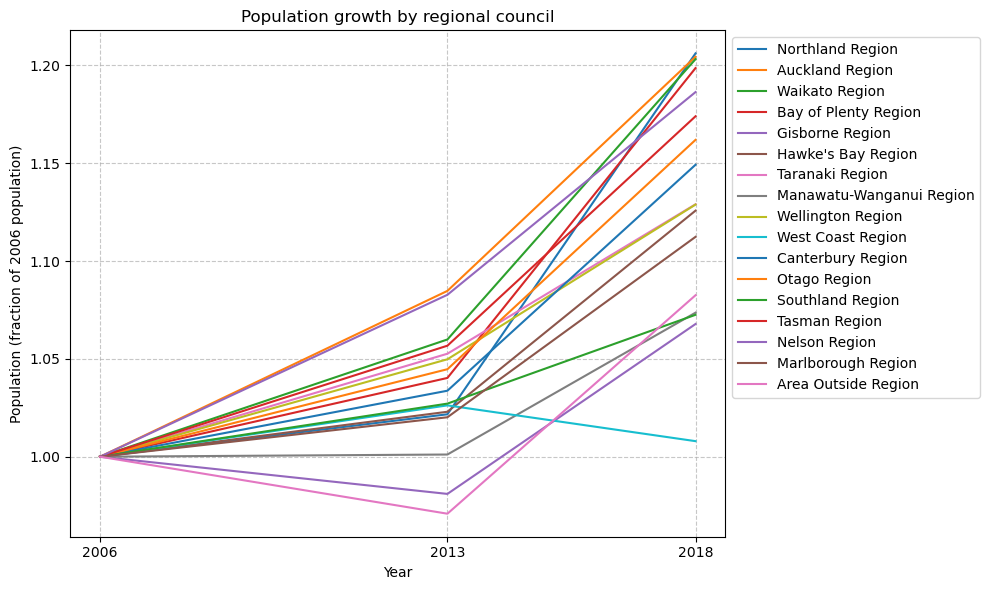

In [398]:
# plot each row as a time series
plt.figure(figsize=(10, 6))

# get the years as integers for proper spacing
years = [int(col) for col in RC_pop_df.columns]

for i, row in RC_pop_df.iterrows():
    plt.plot(years, row.values, label=i)
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Population growth by regional council')
plt.ylabel('Population (fraction of 2006 population)')
plt.xlabel('Year')
plt.xticks(years)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Can you repeat the above for territorial authorities?

In [399]:
# if we really want to do time series analysis we should probably get the data into a suitable "long" format
# note that we can split the columns into those starting with "Census_2006", "Census_2013", and "Census_2018"


# let's first check which columns don't start with one of these strings
non_census_cols = [c for c in RC_df.columns if not c.startswith('Census')]
non_census_cols

['Area_code_and_description', 'Area_code', 'Area_description']

In [400]:
# so for each of the three census years, we want to select the columns that start with that year
def create_year_df(df, year):
    cols = [c for c in df.columns if c.startswith(f"Census_{year}")]   
    year_df = df.loc[:, ['Area_description']+cols]
    # you can now drop the 'Census_' prefix
    year_df.columns = ['Area_description'] + [c.split(f"Census_{year}_")[1] for c in cols]
    # also add a year column
    year_df['Year'] = year
    # Area_description and Year should be the first two columns, and form a primary key
    year_df = year_df.set_index(['Area_description', 'Year'])
    return year_df

RC_2006_df = create_year_df(RC_df, 2006)
RC_2013_df = create_year_df(RC_df, 2013)
RC_2018_df = create_year_df(RC_df, 2018)

# now concatenate these three dataframes
RC_long_df = pd.concat([RC_2006_df, RC_2013_df, RC_2018_df])
RC_long_df.head()




,,usually_resident_population_count,census_night_population_count,Sex_1_Male_CURP,Sex_2_Female_CURP,Sex_Total_CURP,Age_5_year_groups_01_0_to_4_years_CURP,Age_5_year_groups_02_5_to_9_years_CURP,Age_5_year_groups_03_10_to_14_years_CURP,Age_5_year_groups_04_15_to_19_years_CURP,Age_5_year_groups_05_20_to_24_years_CURP,...,Travel_to_education_by_education_address_004_Bicycle_CURP_studying,Travel_to_education_by_education_address_005_Walk_or_jog_CURP_studying,Travel_to_education_by_education_address_006_School_bus_CURP_studying,Travel_to_education_by_education_address_007_Public_bus_CURP_studying,Travel_to_education_by_education_address_008_Train_CURP_studying,Travel_to_education_by_education_address_009_Ferry_CURP_studying,Travel_to_education_by_education_address_010_Other_CURP_studying,Travel_to_education_by_education_address_Total_stated_CURP_studying,Travel_to_education_by_education_address_999_Not_elsewhere_included_CURP_studying,Travel_to_education_by_education_address_Total_CURP_studying
Area_description,Year,,,,,,,,,,,,,,,,,,,,,
Northland Region,2006,148470,154392,72843,75630,148470,10272,11559,12951,10560,6600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Auckland Region,2006,1304958,1322925,635454,669504,1304958,94077,95328,99711,99444,99060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Waikato Region,2006,380823,391320,186894,193932,380823,27495,28791,30711,28821,25017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bay of Plenty Region,2006,257379,264180,124812,132567,257379,18267,19782,21222,18117,12603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gisborne Region,2006,44499,48681,21687,22809,44499,3651,3852,4149,3459,2295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [401]:
# now let's see what we can find out about te reo speaking
# look for columns which include 'language'
language_cols = [c for c in RC_long_df.columns if 'language' in c.lower()]
language_cols

['Languages_total_responses_01_English_CURP',
 'Languages_total_responses_02_Māori_CURP',
 'Languages_total_responses_03_Samoan_CURP',
 'Languages_total_responses_04_New_Zealand_Sign_Language_CURP',
 'Languages_total_responses_05_Other_CURP',
 'Languages_total_responses_66_None_eg_too_young_to_talk_CURP',
 'Languages_total_responses_Total_stated_CURP',
 'Languages_total_responses_99_Not_elsewhere_included_CURP',
 'Languages_total_responses_Total_CURP']

In [402]:
# check out 'Languages_total_responses_02_Māori_CURP'; compare with 'usually_resident_population_count'
RC_reo_df = RC_long_df.loc[:, ['Languages_total_responses_02_Māori_CURP', 'usually_resident_population_count']]

In [403]:
# coerce both columns to numeric
RC_reo_df['Languages_total_responses_02_Māori_CURP'] = pd.to_numeric(RC_reo_df['Languages_total_responses_02_Māori_CURP'], errors='coerce')
RC_reo_df['usually_resident_population_count'] = pd.to_numeric(RC_reo_df['usually_resident_population_count'], errors='coerce')

# calculate the proportion of te reo speakers
RC_reo_df['prop_te_reo'] = RC_reo_df['Languages_total_responses_02_Māori_CURP'] / RC_reo_df['usually_resident_population_count']


In [404]:
# extract 'Area_description' and 'Year' from the index
RC_reo_df['Area_description'] = RC_reo_df.index.get_level_values('Area_description')
RC_reo_df['Year'] = RC_reo_df.index.get_level_values('Year')
RC_reo_df = RC_reo_df.reset_index(drop=True)
RC_reo_df

    

,Languages_total_responses_02_Māori_CURP,usually_resident_population_count,prop_te_reo,Area_description,Year
0,13455,148470,0.090624,Northland Region,2006
1,33243,1304958,0.025474,Auckland Region,2006
2,22122,380823,0.058090,Waikato Region,2006
3,22920,257379,0.089052,Bay of Plenty Region,2006
4,6738,44499,0.151419,Gisborne Region,2006
5,9684,147783,0.065529,Hawke's Bay Region,2006
6,3936,104127,0.037800,Taranaki Region,2006
7,11820,222423,0.053142,Manawatu-Wanganui Region,2006
8,15699,448959,0.034968,Wellington Region,2006
9,600,31326,0.019153,West Coast Region,2006


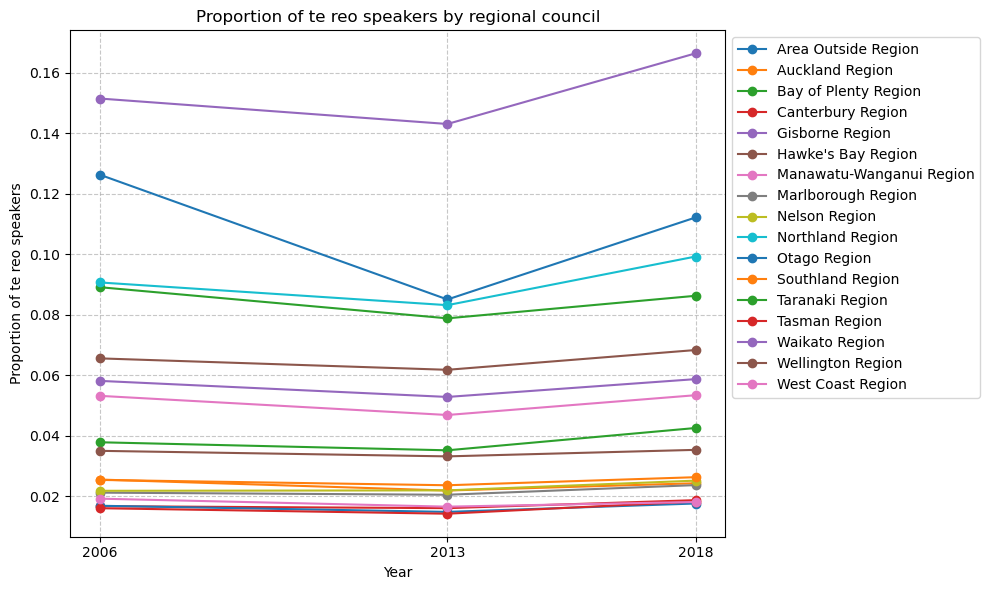

In [405]:
# plot the proportion of te reo speakers by regional council, over time, as a time series
plt.figure(figsize=(10, 6))

# Group by Area_description to plot one line per regional council
for area, data in RC_reo_df.groupby('Area_description'):
    plt.plot(data['Year'], data['prop_te_reo'], 'o-', label=area)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Proportion of te reo speakers by regional council')
plt.ylabel('Proportion of te reo speakers')
plt.xlabel('Year')
plt.xticks([2006, 2013, 2018])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [406]:
# let's use the Census_x prefix (where x=year) to put the data in long format




In [407]:
# let's also concatenate pop cols from RC_df
RC_pop_df = RC_df.loc[:, ['Area_description']+pop_cols]
RC_pop_df.columns = ['Area_description'] + [c.split('_')[1] for c in pop_cols]
RC_pop_df = RC_pop_df.set_index('Area_description')
RC_pop_df



,2006,2013,2018
Area_description,,,
Northland Region,148470,151689,179076
Auckland Region,1304958,1415550,1571718
Waikato Region,380823,403641,458202
Bay of Plenty Region,257379,267741,308499
Gisborne Region,44499,43653,47517
Hawke's Bay Region,147783,151179,166368
Taranaki Region,104127,109608,117561
Manawatu-Wanganui Region,222423,222672,238797
Wellington Region,448959,471315,506814
